<a href="https://colab.research.google.com/github/AVICII-24/Exoplanet-Inclination-Classification/blob/main/Inclinination_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install batman-package numpy==1.25 matplotlib pandas

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import batman
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [10]:
from google.colab import files

uploaded = files.upload()

Saving Copy - Total Set 2-Table 1.csv to Copy - Total Set 2-Table 1.csv


In [18]:
df = pd.read_csv('Copy - Total Set 2-Table 1.csv')

In [22]:
selected_cols = [
    'pl_name', 'pl_orbper', 'pl_orbsmax', 'pl_rade',
    'pl_orbincl', 'pl_trandep', 'pl_trandur',
    'st_rad', 'st_mass', 'st_teff', 'pl_eqt'
]

df_inclination = df[selected_cols].dropna()
print(df_inclination)

           pl_name  pl_orbper  pl_orbsmax    pl_rade  pl_orbincl  pl_trandep  \
0         AU Mic b   8.463080     0.06490   3.956770    89.57917      0.2379   
1         AU Mic c  18.859690     0.11080   2.522021    89.22655      0.0970   
3     BD-14 3065 b   4.288973     0.06560  21.590000    80.78000      0.6490   
11        GJ 357 b   3.930600     0.03600   1.200000    89.22800      0.0955   
27       HD 1397 b  11.535330     0.10970  11.500434    88.99000      0.2037   
..             ...        ...         ...        ...         ...         ...   
599    TOI-858 B b   3.279718     0.04435  14.067271    86.80000      0.9740   
600      TOI-871 b  14.362565     0.10540   1.664000    89.26000      0.0450   
605      TOI-905 b   3.739494     0.04666  13.125739    85.68000      1.7180   
612      TOI-969 b   1.823730     0.02636   2.765000    86.75000      0.1435   
617  WD 1856+534 b   1.407941     0.02040  10.400000    88.77800     56.6500   

     pl_trandur  st_rad  st_mass  st_te

In [27]:
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train_data = df[msk]
test_data = df[~msk]

train_data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate,split
0,AU Mic b,AU Mic,1,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-31d20m32.82s,-31.342450,9.7221,8.810,4.529,7.84038,2024-09-28,2023-12,2024-09-28,-0.536830
1,AU Mic c,AU Mic,1,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-31d20m32.82s,-31.342450,9.7221,8.810,4.529,7.84038,2024-09-28,2023-12,2024-09-28,0.630099
2,BD+05 4868 A b,BD+05 4868 A,1,2,1,Transit,2025,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,+06d36m19.15s,6.605319,43.5687,10.158,7.448,9.84152,2025-03-21,2025-01,2025-03-21,-0.349321
3,BD-14 3065 b,BD-14 3065 A,1,3,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-15d38m34.21s,-15.642837,589.4230,11.100,9.932,10.91000,2024-06-25,2024-03,2024-06-25,0.086130
5,GJ 1252 b,GJ 1252,1,1,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-56d27m44.23s,-56.462286,20.3730,12.680,7.915,11.23640,2023-07-10,2022-09,2023-07-10,-0.660870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,WASP-126 c,WASP-126,1,1,2,Transit Timing Variations,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-69d13m35.73s,-69.226593,216.5260,10.994,9.598,11.06650,2019-12-02,2019-12,2019-12-05,0.653701
614,WASP-132 c,WASP-132,1,1,3,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,-46d09m34.26s,-46.159516,122.9100,11.938,9.674,11.75380,2025-01-29,2025-01,2025-01-29,-0.600143
616,WASP-84 c,WASP-84,1,1,2,Transit,2023,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,+01d51m35.62s,1.859893,100.5880,10.825,8.855,10.57450,2023-07-10,2023-06,2023-07-10,-0.016825
617,WD 1856+534 b,WD 1856+534,1,3,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,...,+53d30m32.49s,53.509024,24.7359,17.244,15.548,16.95800,2020-12-10,2020-09,2020-12-17,-0.392825


In [49]:
def classify_inclination(i):
    if i >= 89.5:
        return "Edge-on"
    elif 80 <= i <89.5:
        return "Moderate"
    else:
        return "Face-on"

df_inclination['incl_class'] = df_inclination['pl_orbincl'].apply(classify_inclination)

In [54]:
X = df_inclination.drop(['pl_orbincl', 'incl_class','pl_name'], axis=1)
y = df_inclination['incl_class']

print(X)

# Encode labels and scale features
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_cat = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Conv1D
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cat, test_size=0.2, random_state=42)

#CNN Model
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.2)

#Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.2f}")

     pl_orbper  pl_orbsmax    pl_rade  pl_trandep  pl_trandur  st_rad  \
0     8.463080     0.06490   3.956770      0.2379      3.4927  0.7440   
1    18.859690     0.11080   2.522021      0.0970      4.2360  0.7440   
3     4.288973     0.06560  21.590000      0.6490      3.0860  2.3500   
11    3.930600     0.03600   1.200000      0.0955      1.2910  0.3370   
27   11.535330     0.10970  11.500434      0.2037      8.6016  2.3360   
..         ...         ...        ...         ...         ...     ...   
599   3.279718     0.04435  14.067271      0.9740      3.6024  1.3080   
600  14.362565     0.10540   1.664000      0.0450      4.0320  0.7190   
605   3.739494     0.04666  13.125739      1.7180      2.0280  0.9180   
612   1.823730     0.02636   2.765000      0.1435      1.5190  0.6710   
617   1.407941     0.02040  10.400000     56.6500      0.1333  0.0131   

     st_mass  st_teff  pl_eqt  
0      0.510   3678.0   600.0  
1      0.510   3678.0   459.0  
3      1.410   6935.0  2001

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.5635 - loss: 1.0189 - val_accuracy: 0.8000 - val_loss: 0.8005
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8116 - loss: 0.7670 - val_accuracy: 0.8000 - val_loss: 0.6715
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7554 - loss: 0.7054 - val_accuracy: 0.8000 - val_loss: 0.6271
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8234 - loss: 0.5586 - val_accuracy: 0.8000 - val_loss: 0.6197
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8418 - loss: 0.5604 - val_accuracy: 0.8000 - val_loss: 0.6159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.7500 - loss: 0.6872

✅ Test Accuracy: 0.75


In [55]:
y_val_labels = np.argmax(y_test, axis=1)
unique, counts = np.unique(y_val_labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 8, 1: 1, 2: 23}


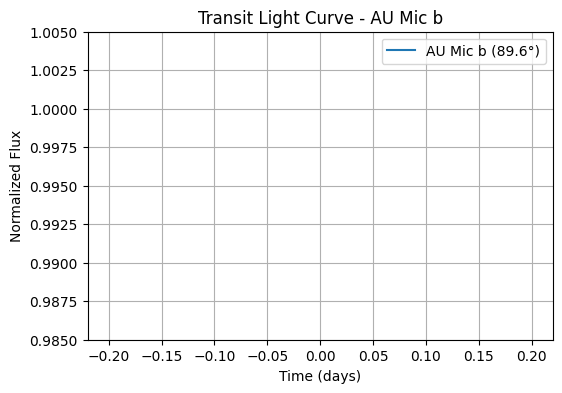

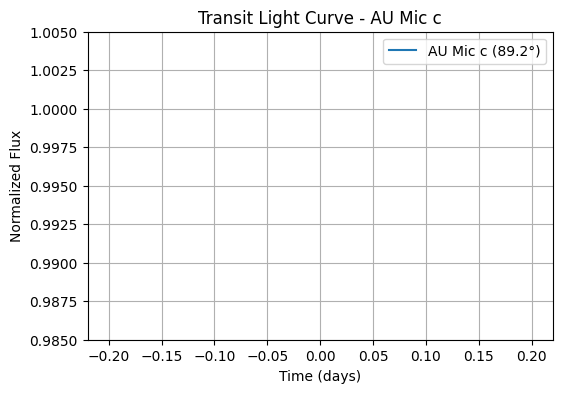

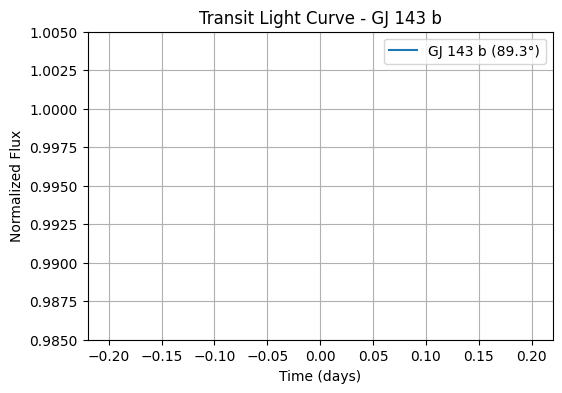

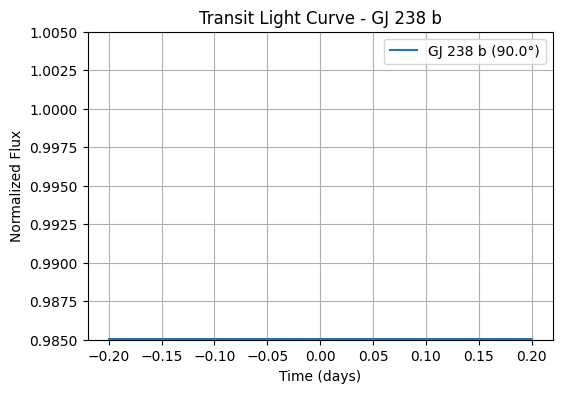

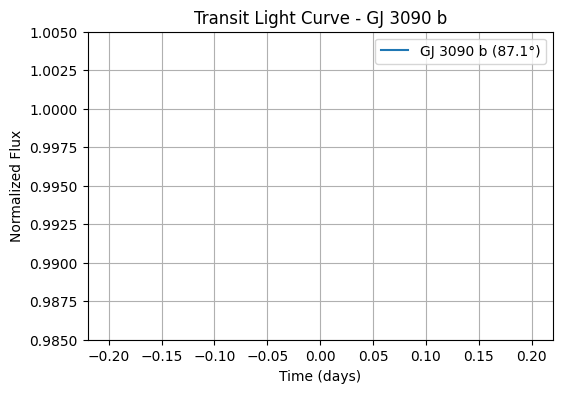

In [67]:
# Filter rows with necessary data and near-edge-on inclinations
df = df[['pl_name', 'pl_orbper', 'pl_radj', 'pl_orbsmax', 'pl_orbincl', 'st_rad']].dropna()
df = df[(df['pl_orbincl'] > 85) & (df['pl_orbincl'] < 95)]  # Only near-90° inclinations
df = df[df['pl_radj'] / df['st_rad'] > 0.05]  # Filter for larger radius ratio

# Generate and plot light curves
def plot_light_curve(row):
    t = np.linspace(-0.2, 0.2, 1000)  # Larger window around transit
    params = batman.TransitParams()
    params.t0 = 0
    params.per = row['pl_orbper']
    params.rp = row['pl_radj'] / row['st_rad']
    params.a = row['pl_orbsmax'] / row['st_rad']
    params.inc = row['pl_orbincl']
    params.ecc = 0
    params.w = 90
    params.limb_dark = "quadratic"
    params.u = [0.1, 0.3]

    m = batman.TransitModel(params, t)
    flux = m.light_curve(params)

    plt.figure(figsize=(6, 4))
    plt.plot(t, flux, label=f"{row['pl_name']} ({params.inc:.1f}°)")
    plt.title(f"Transit Light Curve - {row['pl_name']}")
    plt.xlabel("Time (days)")
    plt.ylabel("Normalized Flux")
    plt.grid(True)
    plt.legend()
    plt.ylim(0.985, 1.005)
    plt.show()

# Plot light curves for first 5 filtered planets
for _, row in df.head(5).iterrows():
    plot_light_curve(row)